Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [26]:
import pandas as pd
import seaborn as sns

In [5]:
df_city_bikes = pd.read_csv('../data/city_bikes.csv')
df_city_bikes

,Unnamed: 0,station name,free_bikes,latitude,longitude
0,0,01. Curtatone,0,43.321600,11.327948
1,1,02. S. Agostino,0,43.314554,11.331021
2,2,03. S. Girolamo,3,43.316539,11.337212
3,3,04. Fortezza,0,43.320523,11.323225
4,4,05. Antiporto,0,43.328983,11.321913
5,5,06. Due Ponti,4,43.317187,11.354256
6,6,07. Napoli,1,43.341757,11.305010
7,7,08. Ospedale,0,43.343243,11.326733
8,8,09. Acquacalda,0,43.336999,11.300975
9,9,10. Ravacciano,1,43.323781,11.338891


In [8]:
df_foursquare_yelp = pd.read_csv('../data/foursquare_yelp.csv')
df_foursquare_yelp

,Unnamed: 0,station name,name,address,category,rating
0,0,01. Curtatone,Pizzeria Alle Scalette,Viale Curtatone 18,Pizzeria,NaN
1,1,01. Curtatone,Piazza Giacomo Matteotti,Piazza Giacomo Matteotti,Plaza,NaN
2,2,01. Curtatone,Basilica di San Domenico,Piazza San Domenico,Church,NaN
3,3,01. Curtatone,Caffè La Piazzetta,Via Montanini 52,Bar,NaN
4,4,01. Curtatone,Consorzio Agrario di Siena,Via Pianigiani Giuseppe 9,Grocery Store,NaN
...,...,...,...,...,...,...
408,408,19. Petriccio,la veranda,Piazza Calabria,Italian,4.5
409,409,19. Petriccio,Fontebecci,Via Fiorentina 133,Pizza,2.0
410,410,19. Petriccio,Mc Donald's,Via Fiorentina 124,Fast Food,2.0
411,411,19. Petriccio,Bar Cecco,Viale Camillo Benso Conte Di Cavour,Cafes,3.0


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [15]:
df_merge = pd.merge(df_foursquare_yelp, df_city_bikes, on='station name')
df_merge.columns


Index(['Unnamed: 0_x', 'station name', 'name', 'address', 'category', 'rating',
       'Unnamed: 0_y', 'free_bikes', 'latitude', 'longitude'],
      dtype='object')

In [19]:
# remove the unused columns
df_merge = df_merge.drop('Unnamed: 0_x', axis=1)

In [20]:
df_merge = df_merge.drop('Unnamed: 0_y', axis=1)

In [24]:
df_merge.shape

(413, 8)

Find out more about the data using descriptive statistics. Descriptive statistics gives a way of giving a brief overview of the dataset we are dealing with, including some measures and features of the sample
Consider grouping data (basic grouping with group by)
Consider plotting data columns to find out how the data in the columns are distributed
Consider creating scatter plots to explore the relationships between two numerical columns
Conduct a hypothesis test against a hypothesis based on your understanding or observation of the data
Consider exploring correlations among different variables (different columns)

In [25]:
# Find out more about the data using descriptive statistics.
df_merge.describe()

,rating,free_bikes,latitude,longitude
count,223.000000,413.000000,413.000000,413.000000
mean,4.244395,1.280872,43.325393,11.326135
std,0.736532,2.101444,0.011160,0.011510
min,1.000000,0.000000,43.296856,11.300975
25%,4.000000,0.000000,43.317187,11.321913
50%,4.500000,0.000000,43.323781,11.326733
75%,4.500000,2.000000,43.332288,11.333702
max,5.000000,9.000000,43.347800,11.354256


Note:
- The overall rating is quite good > 4.0
- The number of free bikes at each station is low ~ 1.3
  

<Axes: xlabel='rating', ylabel='Count'>

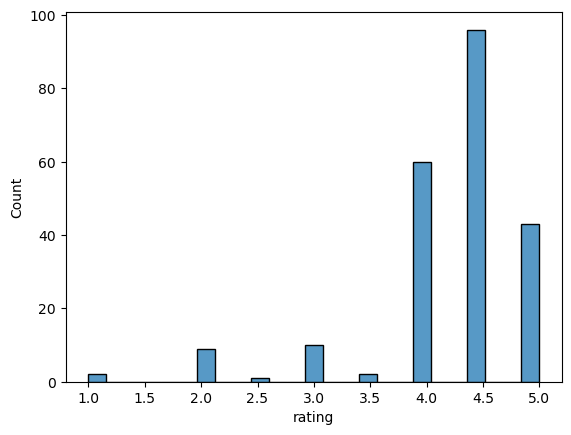

In [27]:
# histogram
sns.histplot(df_merge['rating'])

In [28]:
sorted(list(df_merge.columns))

['address',
 'category',
 'free_bikes',
 'latitude',
 'longitude',
 'name',
 'rating',
 'station name']

<Axes: xlabel='free_bikes', ylabel='rating'>

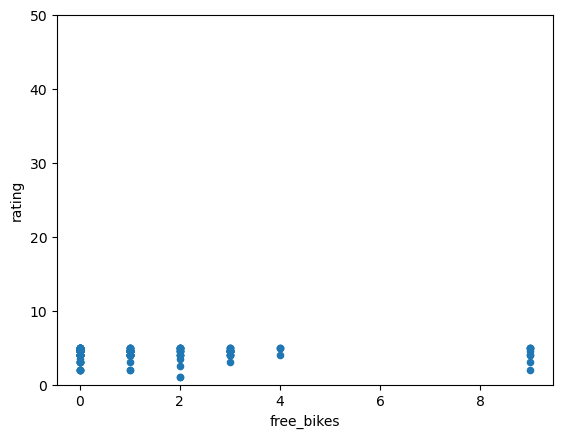

In [42]:
# scatter plot free_bikes & rating
var = 'free_bikes'
data = df_merge[['rating',var]]
data.plot.scatter(x=var, y='rating', ylim=(0,50))

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [43]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

Look at the data before and after the join to validate your data.

In [44]:
connection = create_connection("sm_app.sqlite")

Connection to SQLite DB successful


In [45]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [47]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 412
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   station name  413 non-null    object 
 1   name          413 non-null    object 
 2   address       413 non-null    object 
 3   category      393 non-null    object 
 4   rating        223 non-null    float64
 5   free_bikes    413 non-null    int64  
 6   latitude      413 non-null    float64
 7   longitude     413 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 45.2+ KB


In [61]:
create_pois_table = """
CREATE TABLE IF NOT EXISTS POIS (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  station_name TEXT NOT NULL,
  name TEXT NOT NULL,
  address TEXT,
  category TEXT,
  rating FLOAT,
  free_bikes INTEGER,
  latitude FLOAT,
  longitude FLOAT
);
"""

In [62]:
execute_query(connection, create_pois_table)

Query executed successfully


In [67]:
df_merge.to_sql('pois', con=connection, if_exists='append')

413

In [68]:
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [71]:
select_pois = "SELECT * from pois"
pois = execute_read_query(connection, select_users)

for poi in pois:
    print(poi)

(0, '01. Curtatone', 'Pizzeria Alle Scalette', 'Viale Curtatone 18', 'Pizzeria', None, 0, 43.32159969615422, 11.327948187171955)
(1, '01. Curtatone', 'Piazza Giacomo Matteotti', 'Piazza Giacomo Matteotti', 'Plaza', None, 0, 43.32159969615422, 11.327948187171955)
(2, '01. Curtatone', 'Basilica di San Domenico', 'Piazza San Domenico', 'Church', None, 0, 43.32159969615422, 11.327948187171955)
(3, '01. Curtatone', 'Caffè La Piazzetta', 'Via Montanini 52', 'Bar', None, 0, 43.32159969615422, 11.327948187171955)
(4, '01. Curtatone', 'Consorzio Agrario di Siena', 'Via Pianigiani Giuseppe 9', 'Grocery Store', None, 0, 43.32159969615422, 11.327948187171955)
(5, '01. Curtatone', 'Il Masgalano', 'Via Camporegio 1', 'Pizzeria', None, 0, 43.32159969615422, 11.327948187171955)
(6, '01. Curtatone', 'Il Pomodorino', 'Via Camporegio 13', 'Pizzeria', None, 0, 43.32159969615422, 11.327948187171955)
(7, '01. Curtatone', 'Zest Ristorante & Winebar', "Costa di Sant'Antonio 13", 'Wine Bar', None, 0, 43.321599